## **Abstract**

Computer Vision, often abbreviated as CV, is defined as a field of study that seeks to develop techniques to help computers “see” and understand the content of digital images such as photographs and videos.

In this Study, we implement image generative models using some popular approaches like Autoencoders, Variational autoencoders and GANs. We implement these models to see how each of them are used to generate new images, work for different datasets and different architectures to see how it influences image generation

## **Autoencoders**

An autoencoder will take a data point, squeeze to fit it in a smaller box(smaller data shape), and will be able to convert it back(to its original form) when required. As our data is not elastic like the stress balls, It will not get back to its original form perfectly which means that we will be losing some information in the process. An autoencoder is made up of two parts-Encoder and Decoder.

The Encoder part of an autoencoder is a neural network (non-recurrent generally) that takes the input data point and squeezes it into a lower dimension state (h: as shown in the below figure). This code(h) is expected to learn important information from the input data point. The Decoder part of the autoencoder is again a neural network that is supposed to take this hidden-code representation(h) of the data as input and reconstruct the original data point as output. Thus the inputs and outputs of an autoencoder are the same, and the most important thing is the hidden state(compressed representation of data) that learns important features from the data.

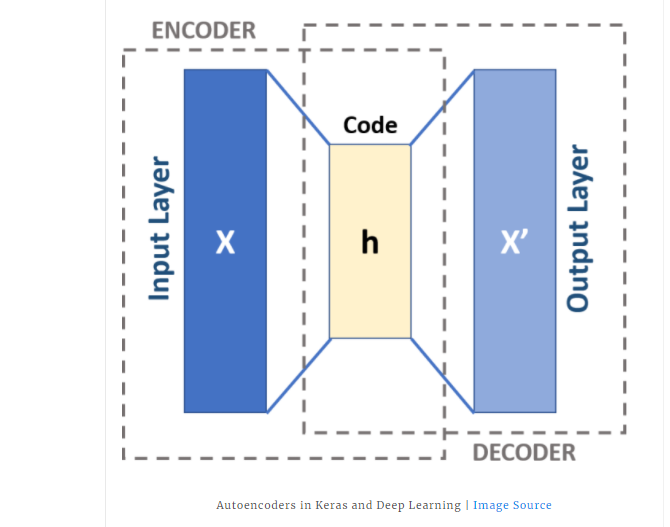

Autoencoders were primarily used for dimensionality reduction and feature learning in the past decades. But recently this technique is quite popular and is widely used in developing generative models (like-Generative Adversarial Networks (GANs).

## **Importing Libraries**

Here we load the fashion_mnist dataset and display some sample images from the dataset. This dataset has 60K training and 10K test images of apparel and shoes. It also has corresponding labels for each image that we won’t need for our experiment. We will train an autoencoder that takes an image as input and reduces it to just 2-dimensions and reconstructs it.

4431872/4422102 [==============================] - 0s 0us/step
Training data shapes: X=(60000, 28, 28), y=(60000,)
Testing data shapes: X=(10000, 28, 28), y=(10000,)


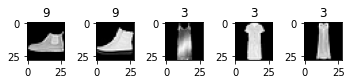

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from tensorflow.keras.datasets import fashion_mnist
 
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
 
print('Training data shapes: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Testing data shapes: X=%s, y=%s' % (testX.shape, testy.shape))
 
for j in range(5):
    i = np.random.randint(0, 10000)
    plt.subplot(550 + 1 + j)
    plt.imshow(trainX[i], cmap='gray')
    plt.title(trainy[i])
plt.show()

These images are 2-D NumPy arrays filled with pixel intensities. We will convert each image into a single dimensional array as we want to pass it into a Multi-layer perceptron model. (Ideally, we should have used Convolutional Neural Network-based autoencoder which is ideal for images).

In [ ]:
# normalizing pixel intensities
trainX = trainX/255
testX = testX/255
#reshaping data into single dimension
train_data = np.reshape(trainX, (60000, 28*28))
test_data = np.reshape(testX, (10000, 28*28))
print (train_data.shape, test_data.shape)

(60000, 784) (10000, 784)


## **Encoder**

We define the encoder part of the model. It takes an array of size 784 as input and passes it through a multi-layer dense network. The final layer of the encoder has only two neurons, this layer is expected to represent each given image with these two float numbers.

In [ ]:
import tensorflow
 
input_data = tensorflow.keras.layers.Input(shape=(784))
 
encoder = tensorflow.keras.layers.Dense(100)(input_data)
encoder = tensorflow.keras.layers.Activation('relu')(encoder)
 
encoder = tensorflow.keras.layers.Dense(50)(encoder)
encoder = tensorflow.keras.layers.Activation('relu')(encoder)
 
encoder = tensorflow.keras.layers.Dense(25)(encoder)
encoder = tensorflow.keras.layers.Activation('relu')(encoder)
 
encoded = tensorflow.keras.layers.Dense(2)(encoder)


## **Decoder**

Most of the time, the decoder part of the autoencoder network is a mirror image of the encoder model. It will take those reduced dimensions as input and reconstruct the original image by increasing the dimensions again to the original ones. Finally, we will get an array of dimensions 784 as output. This output array is expected to be similar to the input array.

In [ ]:
decoder = tensorflow.keras.layers.Dense(25)(encoded)
decoder = tensorflow.keras.layers.Activation('relu')(decoder)
 
decoder = tensorflow.keras.layers.Dense(50)(decoder)
decoder = tensorflow.keras.layers.Activation('relu')(decoder)
 
decoder = tensorflow.keras.layers.Dense(100)(decoder)
decoder = tensorflow.keras.layers.Activation('relu')(decoder)
 
decoded = tensorflow.keras.layers.Dense(784)(decoder)


## **Loss**

We need a loss function that will tell how similar our reconstructed image is with respect to the original input image. As images are just pixel values, Mean Squared Error (‘mse’) would be a good choice to measure how close each pixel is to its corresponding pixel in the real and predicted images.

In [ ]:
autoencoder = tensorflow.keras.models.Model(inputs=input_data, outputs=decoded)
autoencoder.compile(loss='mse', optimizer='adam')
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 activation_1 (Activation)   (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 25)                1275      
                                                                 
 activation_2 (Activation)   (None, 25)                0   

## **Training**

Input(x) and output(y) are same for autoencoders. We will train our model on training images for 30 epochs with a batch size of 64 images.

In [ ]:
autoencoder.fit(train_data, train_data, epochs=30, batch_size=64, validation_data=(test_data, test_data))


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0247 - val_loss: 0.0247
Epoch 2/30
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0248 - val_loss: 0.0247
Epoch 3/30
60000/60000 [==============================] - 4s 75us/sample - loss: 0.0250 - val_loss: 0.0251
Epoch 4/30
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0250 - val_loss: 0.0259
Epoch 5/30
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0251 - val_loss: 0.0251
Epoch 6/30
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0249 - val_loss: 0.0248
Epoch 7/30
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0247 - val_loss: 0.0249
Epoch 8/30
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0246 - val_loss: 0.0247
Epoch 9/30
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0246 - val

## **Prediction**

We will plot the original as well as re-constructed images to check how good our model is performing-

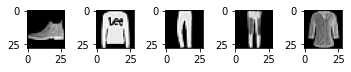

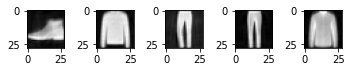

In [ ]:
# Real Images
for i in range(5):
    plt.subplot(550 + 1 + i)
    plt.imshow(testX[i], cmap='gray')
plt.show()
 
# Reconstructed Images
for i in range(5):
    plt.subplot(550 + 1 + i)
    output = autoencoder.predict(np.array([test_data[i]]))
    op_image = np.reshape(output[0]*255, (28, 28))
    plt.imshow(op_image, cmap='gray')
plt.show()

The first row has 5 real images, and the second row has corresponding reconstructed images. We can see that the output images are a little blurry still they are quite readable. With more training and deeper network, model should be able to learn the difference.

## **Reduced Dimensions**

We saw that this small network was capable of re-constructing the original image using just two numbers(h: layer) from the encoding layer(bottleneck layer). Now these reduced dimensions can be used in other applications as features for these images. To verify the fact, let’s plot these embeddings(features) for all the test dataset images.

In [ ]:
dr_model = tf.keras.models.Model(inputs=autoencoder.get_layer('input_3').input, outputs=autoencoder.get_layer('dense_6').output)
dr_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 activation_1 (Activation)   (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 25)                1275      
                                                                 
 activation_2 (Activation)   (None, 25)                0   

Each image from the test dataset is represented with 2-dimensions and is plotted as a point in the scatterplot below where color represents the label of the image. We can notice that the same images are closer in the latent space. Even this simple autoencoder is able to separate out images in different cluster

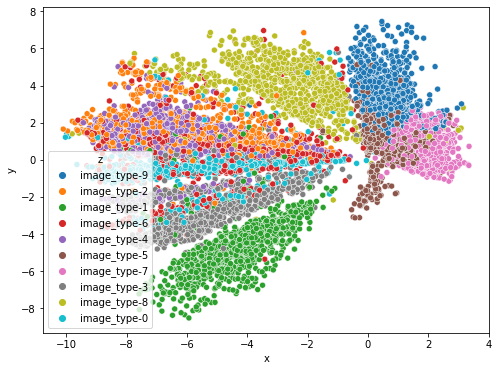

In [ ]:
x = []
y = []
z = []
for i in range(10000):
    z.append(testy[i])
    op = dr_model.predict(np.array([test_data[i]]))
    x.append(op[0][0])
    y.append(op[0][1])
 
df = pd.DataFrame()
df['x'] = x
df['y'] = y
df['z'] = ["image_type-"+str(k) for k in z]
 
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', hue='z', data=df)
plt.show()

As we know that the convolutional neural networks are the best choices for image understanding/representations, results would have been even better with CNN-based autoencoder.

Here we gained a basic understanding of the autoencoders in Keras and deep learning. We have implemented a simple autoencoder network to learn representations on the Fashion_msist images dataset. We have also seen that the model was able to learn effective latent features for different images.

## **Changing Network Architecture**

We build a CNN based autoencoder to perform dimensionality reduction on the fashion mnist dataset. First we'll load the training and test set and display a few of the images

In [ ]:
from keras.layers import *
from keras.models import Model, load_model
from keras.datasets import fashion_mnist
from keras.callbacks import ReduceLROnPlateau
from keras import regularizers
from keras import optimizers
from tensorflow.keras.optimizers import Adam
from keras import backend as K
import scipy
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, TextArea
import pandas as pd
import numpy as np

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
x_train = pd.read_csv('drive/My Drive/Colab Notebooks/fashion_mnist/fashion-mnist_train.csv')
x_test = pd.read_csv('drive/My Drive/Colab Notebooks/fashion_mnist/fashion-mnist_test.csv')

In [ ]:
y_train = x_train.pop('label')
y_test = x_test.pop('label')

x_train = np.array(x_train).reshape(-1, 28, 28) / 255.0
x_test = np.array(x_test).reshape(-1, 28, 28) / 255.0

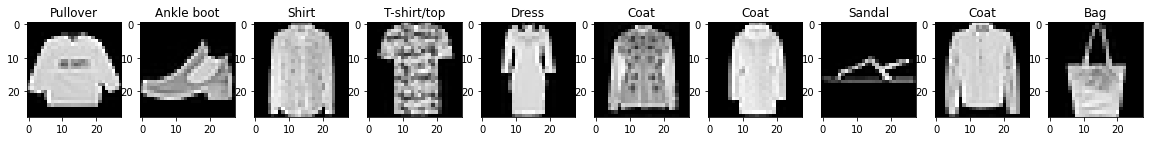

In [ ]:
labeldict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

fig, ax = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    ax[i].imshow(x_train[i], cmap='gray')
    ax[i].set_title(labeldict[y_train[i]])

Now we can start building the autoencoder. We have considered only two latent variables, so we can compare this approach to other dimensionality reduction techniques by visualizing the images on a plane.

In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

def make_and_fit():
    inputs = Input(shape=(28, 28, 1))

    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(32, (2, 2), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)
    x = Conv2D(16, (2, 2), activation='relu', padding='same')(x)
    x = Conv2D(4, (2, 2), activation='relu', padding='same')(x)
    x = Conv2D(1, (2, 2), activation='relu', padding='same')(x)
    x = Flatten()(x)
    encoded = Dense(2, activation='relu')(x)

    encoder = Model(inputs=inputs, outputs=encoded)
    
    encoded_inputs = Input(shape=(2,))

    x = Dense(4, activation='relu')(encoded_inputs)
    x = Reshape((2, 2, 1))(x)
    x = Conv2D(4, (2, 2), activation='relu', padding='same')(x)
    x = Conv2D(16, (2, 2), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((7, 7))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    decoder = Model(inputs=encoded_inputs, outputs=decoded)
    
    x = encoder(inputs)
    x = decoder(x)
    model = Model(inputs=inputs, outputs=x)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'mse'])

    print(model.summary())
    
    clr = ReduceLROnPlateau(
        monitor='loss',
        factor=0.5,
        patience=3,
        min_delta=0.01,
        cooldown=0,
        min_lr=1e-7,
        verbose=1)

    model.fit(
        x_train,
        x_train,
        batch_size=256,
        epochs=50,
        shuffle=True,
        validation_data=(x_test, x_test),
        callbacks=[clr])

    return model, encoder, decoder

model, encoder, decoder = make_and_fit()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 model_12 (Functional)       (None, 2)                 34889     
                                                                 
 model_13 (Functional)       (None, 28, 28, 1)         42417     
                                                                 
Total params: 77,306
Trainable params: 77,082
Non-trainable params: 224
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 28s 475us/sample - loss: 0.3760 - accuracy: 0.4919 - mse: 0.0457 - val_loss: 0.6101 - val_accuracy: 0.5026 - val_mse: 0.1216 - lr: 0.0010
Epoch 2/50
60000/60000 [==============================] - 22s 375

Now that the network is trained, let's visualize the results. Here are two sets of images that the model encodes then decodes. The first is taken out of the test set, the second is random noise.

Between the two images is displayed the encoded representation of the input images (two variables).

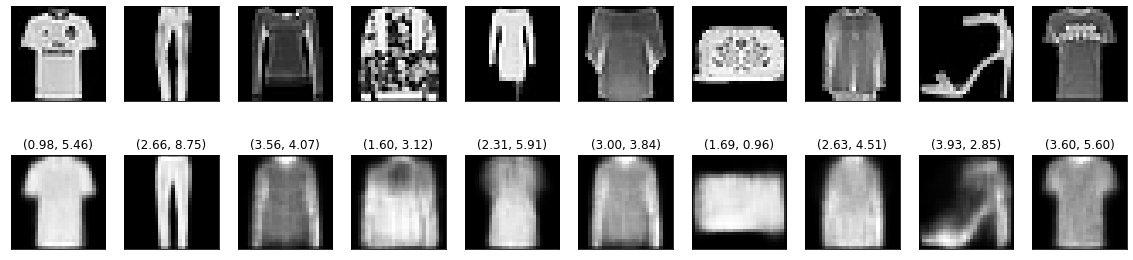

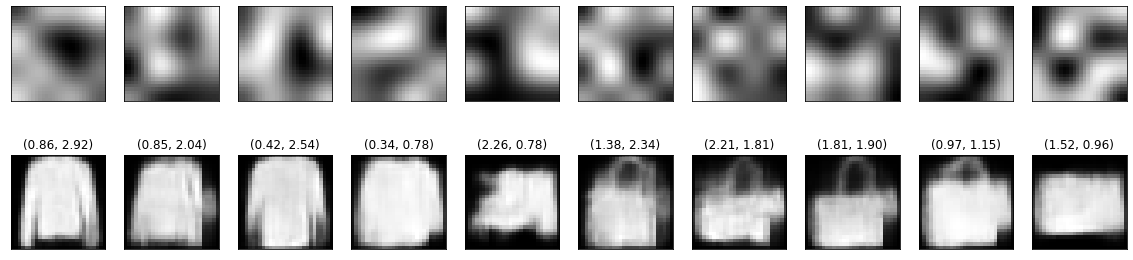

In [ ]:
def get_triple(inputs):
    latent_repr = encoder.predict(inputs)
    outputs = decoder.predict(latent_repr)
    latent_repr = latent_repr.reshape((latent_repr.shape[0], latent_repr.shape[1], 1))

    return inputs, latent_repr, outputs

def show_encodings(inputs, latent_repr, outputs):
    n = len(inputs)
    fig, axes = plt.subplots(2, n, figsize=(2*n, 5))
    for i in range(n):
        axes[1, i].set_title('({0:.2f}, {1:.2f})'.format(float(latent_repr[i, 0]), float(latent_repr[i, 1])))
        axes[0, i].imshow(inputs[i].reshape(28, 28), cmap='gray')
        axes[1, i].imshow(outputs[i].reshape(28, 28), cmap='gray')
    for ax in axes.flatten():
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
show_encodings(*get_triple(x_test[:10]))
inputs = np.random.random(size=(10, 4, 4, 1))
inputs = scipy.ndimage.zoom(inputs, (1, 7, 7, 1))
show_encodings(*get_triple(inputs))

Comparing this approach to other common dimensionality reduction techniques: PCA and T-SNE. We will do this by reducing the 784-dimensional space of the images to two using a technique we want to test. Then we will plot the distribution of the ten classes in the new two-dimensional space and see how separated they are.

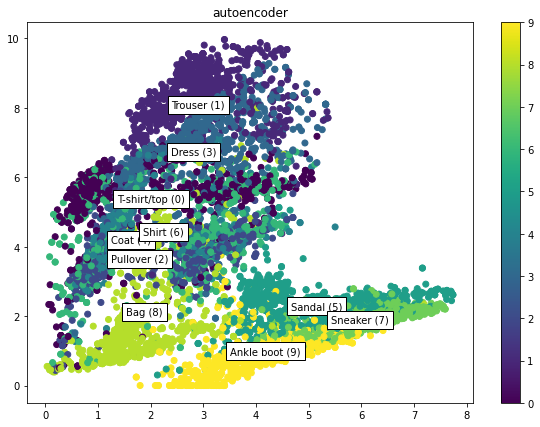

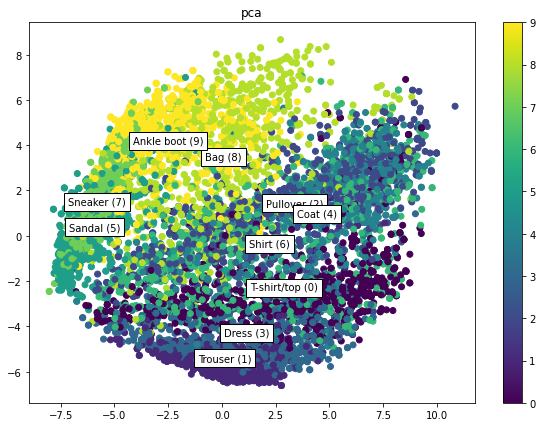

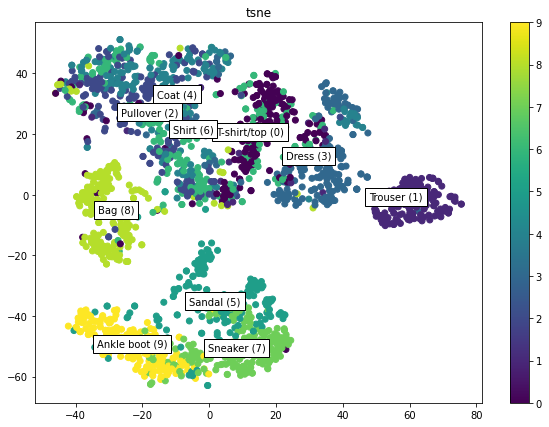

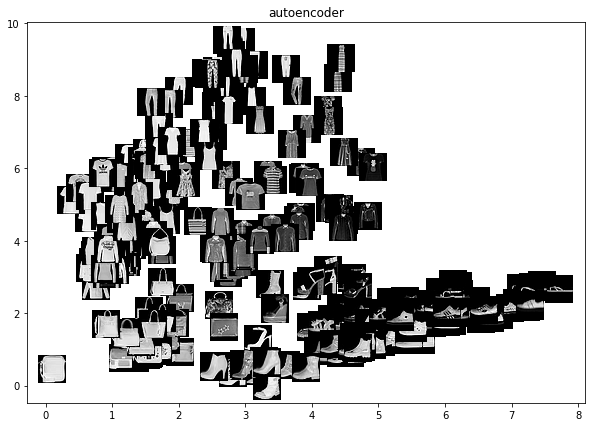

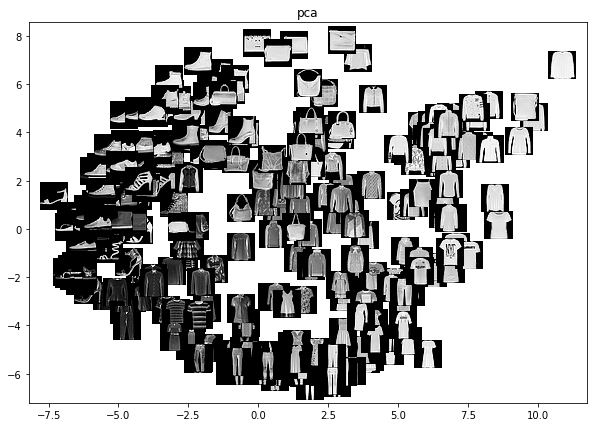

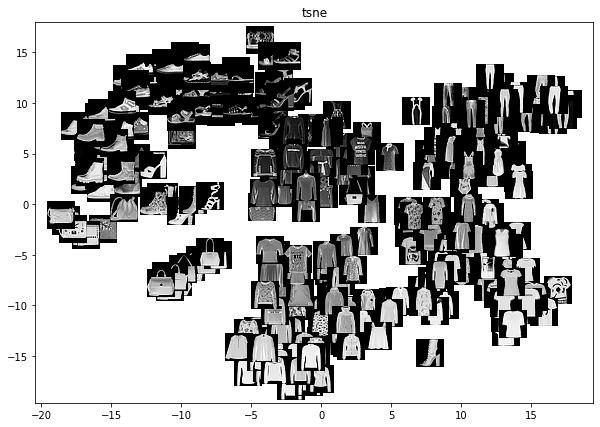

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

def plot_latent(mode, count, technique):
    idx = np.random.choice(len(x_test), count)
    inputs = x_test[idx]
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.set_title(technique)
    if technique == 'autoencoder':
        coords = encoder.predict(inputs)
    elif technique == 'pca':
        coords = PCA(n_components=2).fit_transform(inputs.reshape(count, -1))
    elif technique == 'tsne':
        coords = TSNE(n_components=2).fit_transform(inputs.reshape(count, -1))

    if mode == 'imgs':
        for image, (x, y) in zip(inputs, coords):
            im = OffsetImage(image.reshape(28, 28), zoom=1, cmap='gray')
            ab = AnnotationBbox(im, (x, y), xycoords='data', frameon=False)
            ax.add_artist(ab)
        ax.update_datalim(coords)
        ax.autoscale()
    elif mode == 'dots':
        classes = y_test[idx]
        plt.scatter(coords[:, 0], coords[:, 1], c=classes)
        plt.colorbar()
        for i in range(10):
            class_center = np.mean(coords[classes == i], axis=0)
            text = TextArea('{} ({})'.format(labeldict[i], i))
            ab = AnnotationBbox(text, class_center, xycoords='data', frameon=True)
            ax.add_artist(ab)
    plt.show()

plot_latent('dots', 10000, 'autoencoder')
plot_latent('dots', 10000, 'pca')
plot_latent('dots', 2000, 'tsne')

plot_latent('imgs', 300, 'autoencoder')
plot_latent('imgs', 300, 'pca')
plot_latent('imgs', 300, 'tsne')

By distributing the 10 classes of the ten classes in the new two-dimensional space, we see how the clustering is and how the separation is across the many classes

## **Variational Auto Encoders**

In the last few years, deep learning based generative models have gained more and more interest due to (and implying) some amazing improvements in the field. Relying on huge amount of data, well-designed networks architectures and smart training techniques, deep generative models have shown an incredible ability to produce highly realistic pieces of content of various kind, such as images, texts and sounds. Among these deep generative models, two major families stand out and deserve a special attention: Generative Adversarial Networks (GANs) and Variational Autoencoders (VAEs).

In order to be able to use the decoder of our autoencoder for generative purpose, we have to be sure that the latent space is regular enough. One possible solution to obtain such regularity is to introduce explicit regularisation during the training process. 

A variational autoencoder can be defined as being an autoencoder whose training is regularised to avoid overfitting and ensure that the latent space has good properties that enable generative process.

Just as a standard autoencoder, a variational autoencoder is an architecture composed of both an encoder and a decoder and that is trained to minimise the reconstruction error between the encoded-decoded data and the initial data. However, in order to introduce some regularisation of the latent space, we proceed to a slight modification of the encoding-decoding process: instead of encoding an input as a single point, we encode it as a distribution over the latent space. The model is then trained as follows:

1. First, the input is encoded as distribution over the latent space
2. A point from the latent space is sampled from that distribution
3. The sampled point is decoded and the reconstruction error can be computed
finally, the reconstruction error is backpropagated through the network

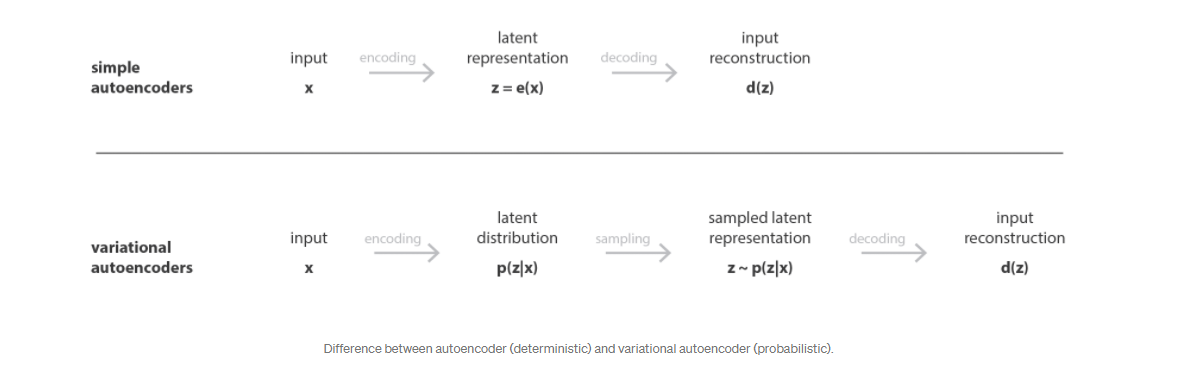

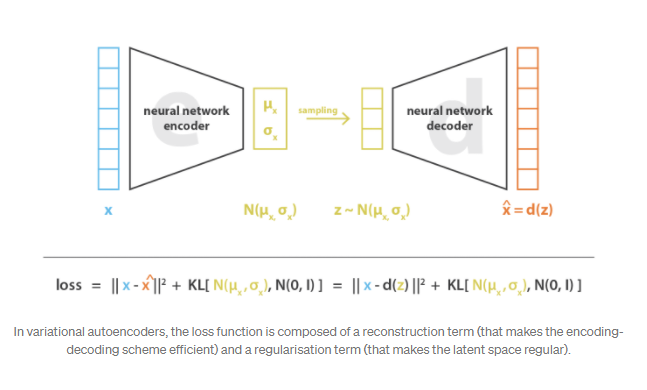

## **Intuitions about the regularisation**

The regularity that is expected from the latent space in order to make generative process possible can be expressed through two main properties: continuity (two close points in the latent space should not give two completely different contents once decoded) and completeness (for a chosen distribution, a point sampled from the latent space should give “meaningful” content once decoded).

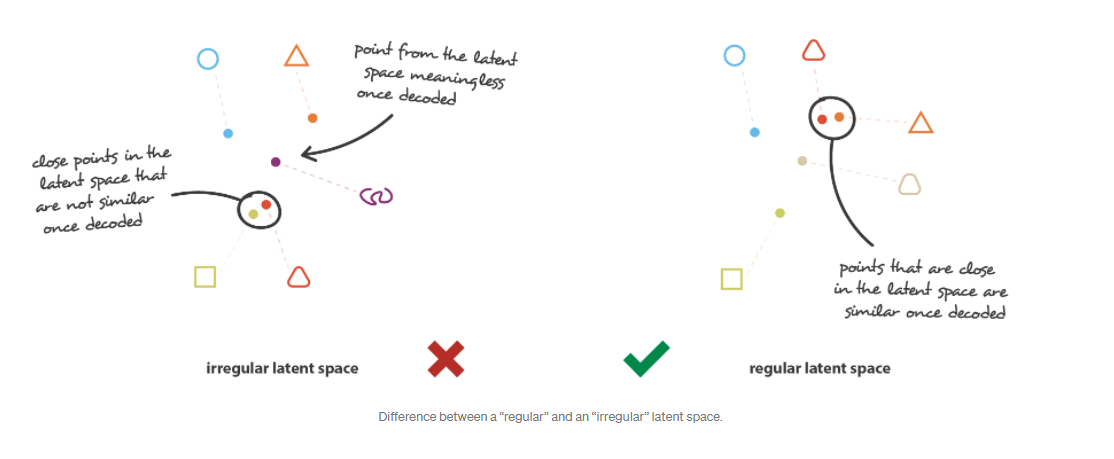

## **Importing the Libraries**

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf; tf.compat.v1.disable_eager_execution()
from keras import backend as K
from keras.layers import Input, Dense, Conv2D, Conv2DTranspose, Flatten, Lambda, Reshape
from keras.models import Model
from keras.losses import binary_crossentropy

import pandas as pd

np.random.seed(25)
tf.executing_eagerly()

from google.colab import drive
#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets('MNIST_data')

In [ ]:
drive.mount('/content/drive', force_remount=True)
df = pd.read_csv('drive/My Drive/Colab Notebooks/TMNIST/94_character_TMNIST.csv')

Mounted at /content/drive


In [ ]:
df.sample()

,names,labels,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
269525,Fuggles-Regular,V,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras.callbacks import EarlyStopping
import re

from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf 
from tensorflow.keras.utils import to_categorical
import cv2
from google.colab import drive
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#### Visualization
def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment

def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 4
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(x=angle, y=value + padding, 
            s=label, ha=alignment, va="center", 
            rotation=rotation, rotation_mode="anchor")

### **Visualizing the Data**

The graph run below is known as the Circular Bar Chart. Each group A,B,C,D represent the different types of data, Numbers, Symbols, letters, etc

The Left circular bar chart represents the number of pixels in each image - the representation might not be that accurate because the scaling and visualization is only for practice.

The right circular bar chart represents the number of images or distribution

In [ ]:
# All labels
all_ = list(df['labels'].unique())

# Regex Pattern
pattern_uc = re.compile(r"[A-Z]")
pattern_lc = re.compile(r"[a-z]")
pattern_numbers = re.compile(r"[0-9]")
pattern_symbols = re.compile(r"[\W]|[\_\,]")

# Extracting Pattern
lower_case = pattern_lc.findall(str(all_))
Upper_case = pattern_uc.findall(str(all_))
Numbers_ = pattern_numbers.findall(str(all_))
Symbols_ = list(set(pattern_symbols.findall(str(all_))))
Symbols_.pop(27)

# Creating Gropus
group = 1
for list_ in (lower_case,Upper_case,Numbers_,Symbols_):
    df.loc[df['labels'].isin(list_), 'group'] = str(group)
    group += 1

In [ ]:
VALUES = df.groupby(['labels']).sum().reset_index()
VALUES = (VALUES.iloc[:,1:-1].sum(axis=1))*0.000001
IMAGES_ = (df.groupby(['labels']).count()['names'].values)*0.025
LABELS = df.groupby(['labels','group']).count().reset_index().sort_values('group')['labels'].values
GROUP = df.groupby(['labels','group']).count().reset_index().sort_values('group')['group'].values
GROUPS_SIZE = [26, 26, 10, 32]

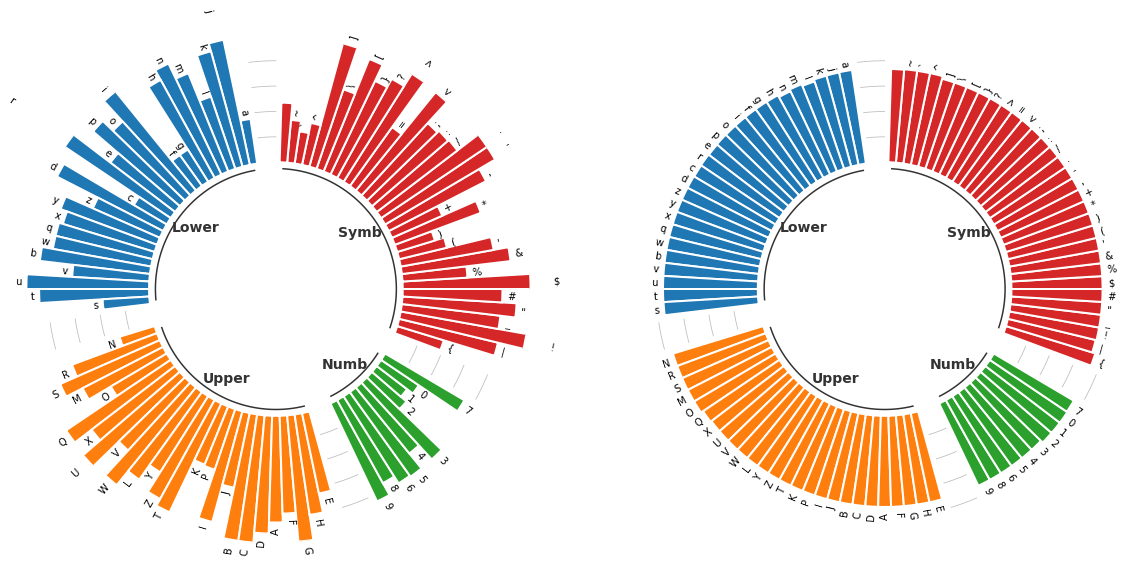

In [ ]:
# Add three empty bars to the end of each group
PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

offset = 0
OFFSET = np.pi / 2
IDXS = []
GROUPS_SIZE = [26, 26, 10, 32]

for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(1,2,figsize=(20, 10), subplot_kw={"projection": "polar"})
ax[0].set_theta_offset(OFFSET)
ax[0].set_ylim(-100, 100)
ax[0].set_frame_on(False)
ax[0].xaxis.grid(False)
ax[0].yaxis.grid(False)
ax[0].set_xticks([])
ax[0].set_yticks([])

COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax[0].bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax[0])
offset = 0 
for group, size in zip(["Lower","Upper","Numb","Symb"], GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax[0].plot(x1, [-5] * 50, color="#333333")
    
    # Add text to indicate group
    ax[0].text(
        np.mean(x1), -20, group, color="#333333", fontsize=14, 
        fontweight="bold", ha="center", va="center"
    )
    
    # Add reference lines at 20, 40, 60, and 80
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    ax[0].plot(x2, [20] * 50, color="#bebebe", lw=0.8)
    ax[0].plot(x2, [40] * 50, color="#bebebe", lw=0.8)
    ax[0].plot(x2, [60] * 50, color="#bebebe", lw=0.8)
    ax[0].plot(x2, [80] * 50, color="#bebebe", lw=0.8)
    
    offset += size + PAD
    
# -------------------------------------
PAD = 3
ANGLES_N = len(IMAGES_) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

offset = 0
OFFSET = np.pi / 2
IDXS = []
GROUPS_SIZE = [26, 26, 10, 32]

for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD
    
ax[1].set_theta_offset(OFFSET)
ax[1].set_ylim(-100, 100)
ax[1].set_frame_on(False)
ax[1].xaxis.grid(False)
ax[1].yaxis.grid(False)
ax[1].set_xticks([])
ax[1].set_yticks([])

COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax[1].bar(
    ANGLES[IDXS], IMAGES_, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], IMAGES_, LABELS, OFFSET, ax[1])
offset = 0 
for group, size in zip(["Lower","Upper","Numb","Symb"], GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax[1].plot(x1, [-5] * 50, color="#333333")
    
    # Add text to indicate group
    ax[1].text(
        np.mean(x1), -20, group, color="#333333", fontsize=14, 
        fontweight="bold", ha="center", va="center"
    )
    
    # Add reference lines at 20, 40, 60, and 80
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    ax[1].plot(x2, [20] * 50, color="#bebebe", lw=0.8)
    ax[1].plot(x2, [40] * 50, color="#bebebe", lw=0.8)
    ax[1].plot(x2, [60] * 50, color="#bebebe", lw=0.8)
    ax[1].plot(x2, [80] * 50, color="#bebebe", lw=0.8)
    
    offset += size + PAD

### **Observation**

As we can observe the data is well distributed, each class has equal number of images as you can see in the circular chart bar.

## **Splitting Labels and Images**

In [ ]:
X = df.iloc[:, 2:-1].astype('float32') # Splitting and turning into Float
y  = df[['labels']] #Extracting Labels

In [ ]:
labels = y['labels'].unique()
values = [num for num in range(len(df['labels'].unique()))]
label_dict= dict(zip(labels,values)) #Creating Dictionary 
label_dict_inv = dict(zip(values,labels))

print(sorted(label_dict.items(), key=lambda x:x[1])[35:45])  #For visualization Purpose

[('N', 35), (']', 36), ('P', 37), ('X', 38), ('|', 39), ('}', 40), ('h', 41), ('7', 42), ('j', 43), ('5', 44)]


In [ ]:
# Transforming
y['labels'].replace(label_dict, inplace=True) #Maping Values
y.tail(5) 

,labels
274088,0
274089,60
274090,84
274091,77
274092,53


## **Splitting into Training and Test Tests**

Images are reshaped and we take a look at some sample images

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
print('xtrain shape = ', X_train.shape)
print('y_train shape = ', y_train.shape)
print('X_test shape = ', X_test.shape)
print('y_Test shape = ', y_test.shape)

xtrain shape =  (219274, 784)
y_train shape =  (219274, 1)
X_test shape =  (54819, 784)
y_Test shape =  (54819, 1)


In [ ]:
Length, Height = 28,28  # <---- Defining LxH 
NCl = y_train.nunique()[0] # Unique targets -- > 94 

# ------>  N of images 28x28
X_train = np.reshape(X_train.values, (X_train.shape[0] ,Length, Height)) 
X_test = np.reshape(X_test.values, (X_test.shape[0] ,Length, Height))

# -------> Target into Categorical Values
y_train = to_categorical(y_train, NCl, dtype='int' )
y_test = to_categorical(y_test, NCl, dtype='int' )

print(f'X:Train, Test data shape:{X_train.shape},{X_test.shape}')
print(f'Y:Train, Test data shape:{y_train.shape},{y_test.shape}')

X:Train, Test data shape:(219274, 28, 28),(54819, 28, 28)
Y:Train, Test data shape:(219274, 94),(54819, 94)


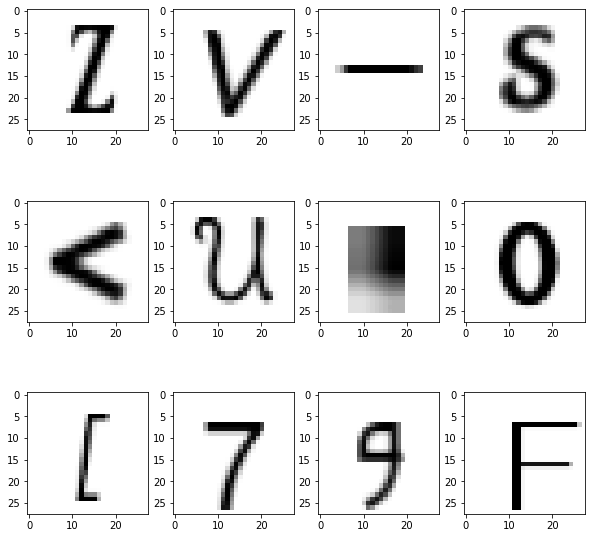

In [ ]:
random = shuffle(X_train[:500]) #Randomly shuffle (array  in a consistent way)
fig,ax = plt.subplots(3,4 , figsize = (10,10)) 
axes = ax.flatten()

for i in range(12):
    _,shu = cv2.threshold(random[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(random[i], (Length, Height)), cmap = 'Greys')
plt.show()

### **Normalizing the Data**

Here we are going to normalize the values which represent the brightness of each pixels, such that those numbers are going to lie within the range of 0 to 1 instead of 0 to 255. It can simply be achieved by dividing all elements in the array by 255 

In [ ]:
X_train = X_train/255

In [ ]:
X_test = X_test/255

In [ ]:
X_train_new = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)

In [ ]:
X_test_new = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [ ]:
print(X_train_new.shape)
print(y_train.shape)
print(X_test_new.shape)
print(y_test.shape)

(219274, 28, 28, 1)
(219274, 94)
(54819, 28, 28, 1)
(54819, 94)


Here we are going to reshape both X_train and X_test. Initially, if we check the shape of the two arrays, it’s going to be (60000, 28, 28) and (10000, 28, 28) respectively.

## **Constructing Encoder**

Before constructing the encoder part of VAE, we are going to define some variables so that we can reuse this architecture for other tasks without needing to change many things in the neural net. Here we are also going to define the input shape for the first layer where the values are taken directly from our image data shape. 

In [ ]:
# Defining some variables
img_height   = X_train_new.shape[1]    # 28
img_width    = X_train_new.shape[2]    # 28
num_channels = X_train_new.shape[3]    # 1
input_shape =  (img_height, img_width, num_channels)   # (28,28,1)
latent_dim = 2    # Dimension of the latent space

In [ ]:
def compute_latent(x):
    mu, sigma = x
    batch = K.shape(mu)[0]
    dim = K.int_shape(mu)[1]
    eps = K.random_normal(shape=(batch,dim))
    return mu + K.exp(sigma/2)*eps

# The loss function for VAE
def kl_reconstruction_loss(true, pred):
    # Reconstruction loss (binary crossentropy)
    reconstruction_loss = binary_crossentropy(K.flatten(true), K.flatten(pred)) * img_width * img_height

    # KL divergence loss
    kl_loss = 1 + sigma - K.square(mu) - K.exp(sigma)
    kl_loss = K.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    # Total loss = 50% rec + 50% KL divergence loss
    return K.mean(reconstruction_loss + kl_loss)

# A function to display image sequence
def display_image_sequence(x_start, y_start, x_end, y_end, no_of_imgs):
    x_axis = np.linspace(x_start,x_end,no_of_imgs)
    y_axis = np.linspace(y_start,y_end,no_of_imgs)
    
    x_axis = x_axis[:, np.newaxis]
    y_axis = y_axis[:, np.newaxis]
    
    new_points = np.hstack((x_axis, y_axis))
    new_images = decoder.predict(new_points)
    new_images = new_images.reshape(new_images.shape[0], new_images.shape[1], new_images.shape[2])
    
    # Display some images
    fig, axes = plt.subplots(ncols=no_of_imgs, sharex=False,
                             sharey=True, figsize=(20, 7))
    counter = 0
    for i in range(no_of_imgs):
        axes[counter].imshow(new_images[i], cmap='gray')
        axes[counter].get_xaxis().set_visible(False)
        axes[counter].get_yaxis().set_visible(False)
        counter += 1
    plt.show()

 Here, instead of using Sequential() model, the Functional style encoder is implemented

In [ ]:
# Constructing encoder
encoder_input = Input(shape=input_shape)

encoder_conv = Conv2D(filters=8, kernel_size=3, strides=2, 
                padding='same', activation='relu')(encoder_input)
encoder_conv = Conv2D(filters=16, kernel_size=3, strides=2, 
                padding='same', activation='relu')(encoder_input)
encoder = Flatten()(encoder_conv)

mu = Dense(latent_dim)(encoder)
sigma = Dense(latent_dim)(encoder)

latent_space = Lambda(compute_latent, output_shape=(latent_dim,))([mu, sigma])

We can see here that the input layer is followed by 2 convolution layers. These 2-stack of Conv2Ds are expected to be able to extract more features in image data. Next, the convolution layers are connected to flatten layer in order to reshape all data into a single one-dimensional array. These flatten layer is then connected to mu and sigma layers where each of those are having 2 neurons. 

In [ ]:
latent_space = Lambda(compute_latent, output_shape=(latent_dim,))([mu, sigma])

In [ ]:
# Take the convolution shape to be used in the decoder
conv_shape = K.int_shape(encoder_conv)
conv_shape

(None, 14, 14, 16)

## **Constructing Decoder**

 Instead of being started with (28, 28 , 1) input shape and outputs a value with the shape of (2,), we are gonna use (2,) as the input shape which will output an image of shape (28, 28, 1). Here’s how I construct the entire decoder:

In [ ]:
# Constructing decoder
decoder_input = Input(shape=(latent_dim,))
decoder = Dense(conv_shape[1]*conv_shape[2]*conv_shape[3], activation='relu')(decoder_input)
decoder = Reshape((conv_shape[1], conv_shape[2], conv_shape[3]))(decoder)
decoder_conv = Conv2DTranspose(filters=16, kernel_size=3, strides=2, 
                           padding='same', activation='relu')(decoder)
decoder_conv = Conv2DTranspose(filters=8, kernel_size=3, strides=2, 
                           padding='same', activation='relu')(decoder)
decoder_conv =  Conv2DTranspose(filters=num_channels, kernel_size=3, 
                          padding='same', activation='sigmoid')(decoder_conv)

It’s important to notice that the convolution layer used in decoder is Conv2DTranspose which works by doing inverse transformation of the standard Conv2D layer. Here’s an article if you wanna know how the transpose layer works. Also, notice that the last Conv2DTranspose layer acts as the output of the decoder where the filters argument has to be 1 (already stored in num_channels variable) as we want to reshape back to the original image dimension (28, 28, 1).

## **Connecting Encoder and Decoder**

Remember that so far we haven’t actually build both encoder and decoder. To do so, we can just simply pass the input and output layer to Model().

In [ ]:
# Actually build encoder, decoder and the entire VAE
encoder = Model(encoder_input, latent_space)
decoder = Model(decoder_input, decoder_conv)
vae = Model(encoder_input, decoder(encoder(encoder_input)))


The encoder and decoder part are not connected just yet. So we need to link the two in order to construct the entire VAE. The code written in bold below is kinda tricky though. The output of vae model is the output of decoder in which its input is taken from the output of encoder.


## **Defining the Loss Function and Compiling the Model**

Variational autoencoders do not use standard loss function like categorical cross entropy, RMSE (Root Mean Square Error) or others. Instead, it uses the combination between binary cross entropy loss and Kullback-Leibler divergence loss (KL loss). Since there is no such function in Keras library, we define it manually.

As the loss function has been defined, we can now compile the vae model with that error function. Here I decided to use Adam optimizer since it usually performs better than any others.

In [ ]:
# Compile the model using KL loss
vae.compile(optimizer='adam', loss=kl_reconstruction_loss)


We now have 3 models which can be trained simply just by applying fit() method to the connecting model (vae). The details of each models can be seen by applying summary() method.

## **Training The Model**

We set the X samples as both x and y arguments. This is done as its required that the reconstructed images to be as similar as the original ones. In other words, the loss value is going to decrease as the produced images get more identical to the actual value.

In [ ]:
# Training VAE
history = vae.fit(x=X_train_new, y=X_train_new, epochs=20, batch_size=32, validation_data=(X_test_new,X_test_new))

Train on 219274 samples, validate on 54819 samples
Epoch 1/20
219274/219274 [==============================] - 95s 435us/sample - loss: 170.4780 - val_loss: 164.0193
Epoch 2/20
219274/219274 [==============================] - 78s 357us/sample - loss: 162.7090 - val_loss: 162.1004
Epoch 3/20
219274/219274 [==============================] - 75s 342us/sample - loss: 161.3728 - val_loss: 161.2748
Epoch 4/20
219274/219274 [==============================] - 74s 340us/sample - loss: 160.7245 - val_loss: 160.9927
Epoch 5/20
219274/219274 [==============================] - 75s 341us/sample - loss: 160.1542 - val_loss: 159.9962
Epoch 6/20
219274/219274 [==============================] - 76s 345us/sample - loss: 159.7014 - val_loss: 159.9708
Epoch 7/20
219274/219274 [==============================] - 74s 335us/sample - loss: 159.3744 - val_loss: 159.6642
Epoch 8/20
219274/219274 [==============================] - 73s 334us/sample - loss: 159.1315 - val_loss: 159.4134
Epoch 9/20
219274/219274 [===

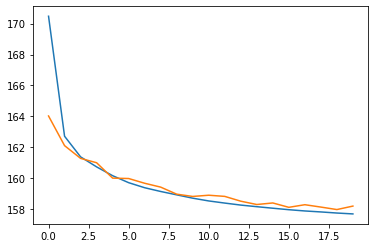

In [ ]:
# Plotting loss value decrease
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

We can see here that the loss value of both train and test data are getting smaller until it stops at the value of around 161. This error might still be even lower if we increase the number of epochs.

In [ ]:
encoded = encoder.predict(X_train_new)

In [ ]:
encoded.shape

(219274, 2)

In [ ]:
def display_image_sequence(x_start,y_start,x_end,y_end,no_of_imgs):
    x_axis = np.linspace(x_start,x_end,no_of_imgs)
    y_axis = np.linspace(y_start,y_end,no_of_imgs)
    
    x_axis = x_axis[:, np.newaxis]
    y_axis = y_axis[:, np.newaxis]
    
    new_points = np.hstack((x_axis, y_axis))
    new_images = decoder.predict(new_points)
    new_images = new_images.reshape(new_images.shape[0], new_images.shape[1], new_images.shape[2])
    
    # Display some images
    fig, axes = plt.subplots(ncols=no_of_imgs, sharex=False,
                             sharey=True, figsize=(100, 60))
    counter = 0
    for i in range(no_of_imgs):
        axes[counter].imshow(new_images[i], cmap='gray')
        axes[counter].get_xaxis().set_visible(False)
        axes[counter].get_yaxis().set_visible(False)
        counter += 1
    plt.show()

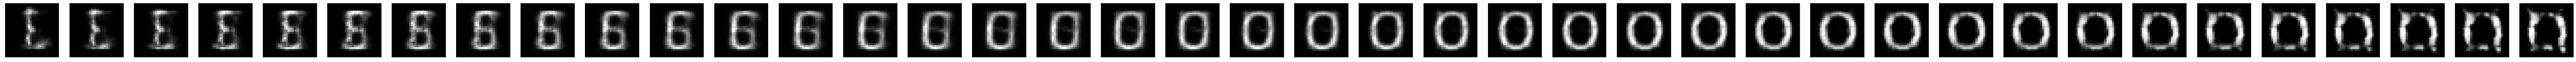

In [ ]:
# Displaying several new images
# Starting point=(0,2), end point=(2,0)
display_image_sequence(0,2,4,0,40)

The figure above shows that the leftmost image is essentially having the value of (0, 2) in latent space while the rightmost image is generated from a point in coordinate (2, 0). All other images in the middle are reconstructed based on values between our starting and end point. 

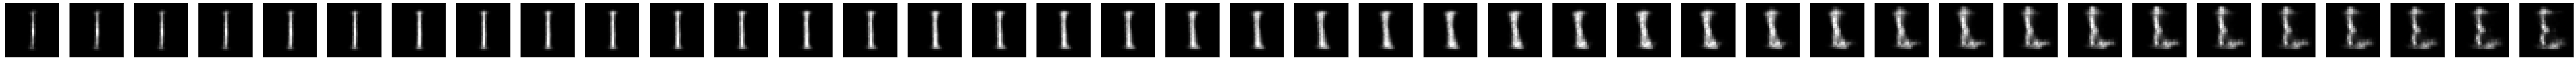

In [ ]:
# Starting point=(-2,1), end point=(0,2)
display_image_sequence(-2,1,0,2,40)

Displaying another image sequence

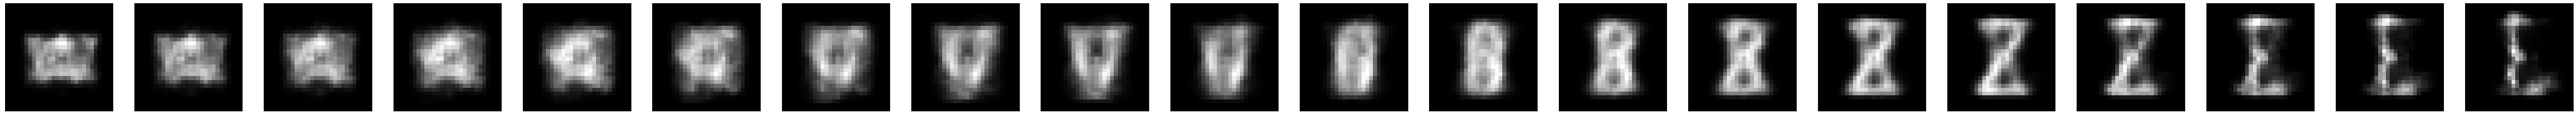

In [ ]:
# Starting point=(0,-2), end point=(0,2)
display_image_sequence(0,-2,0,2,20)

Here, we take points from (0, -2) up until (0, 2). We can see here that the sequence gradually changes from and finally ends at one — the reconstructed images between initial and terminal points sometimes hard to read

## **Conclusion**

We have been able to create new images simply by picking up a new point in a latent space and employ decoder to do the reconstruction.

## **Generative Adversarial Networks**

Generative Adversarial Networks(GAN in short) is an advancement in the field of Machine Learning which is capable of generating new data samples including Text, Audio, Images, Videos, etc. using previously available data. GANs consist of two Artificial Neural Networks or Convolution Neural Networks models namely Generator and Discriminator which are trained against each other (and thus Adversarial). We’ll discuss more this in the following section.



## **How does GAN Work?**

1. **Generator Model**: Used to generate new images which look like real images.
2. **Discriminator Model**: Used to classify images as real or fake


## **Generator Model**

The Generator Model generates new images by taking a fixed size random noise as an input. Generated images are then fed to the Discriminator Model.

The main goal of the Generator is to fool the Discriminator by generating images that look like real images and thus makes it harder for the Discriminator to classify images as real or fake.


## **Discriminator Model**

The Discriminator Model takes an image as an input (generated and real) and classifies it as real or fake.

Generated images come from the Generator and the real images come from the training data.

The discriminator model is the simple binary classification model.


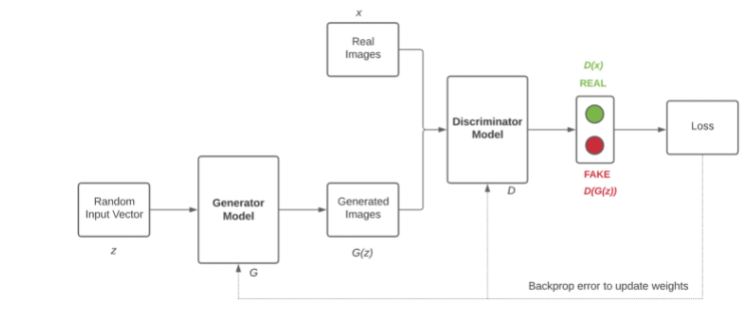

The Generator Model G takes a random input vector z as an input and generates the images G(z). These generated images along with the real images x from training data are then fed to the Discriminator Model D. The Discriminator Model then classifies the images as real or fake. Then,  we have to measure the loss and this loss has to be back propagated to update the weights of  the Generator and the Discriminator.

When we are training the Discriminator, we have to freeze the Generator and back propagate errors to only update the Discriminator.

When we are training the Generator, we have to freeze the Discriminator and back propagate errors to only update the Generator.

Thus the Generator Model and the Discriminator Model getting better and better at each epoch.

We have to stop training when it attains the Nash Equilibrium or D(x) = 0.5 for all x. In simple words, when the generated images look almost like real images. 

The fight between the Generator Model and the Discriminator Model can be expressed mathematically as:

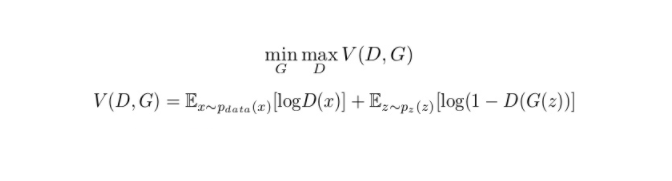

G	Generator Model

D	Discriminator Model

z	Random Noise (Fixed size input vector)

x	Real Image

G(z)	Image generated by Generator (Fake Image)

pdata(x)	Probability Distribution of Real Images

pz(z)	Probability Distribution of Fake Images

D(G(z))	Discriminator’s output when the generated image is an input

D(x)	Discriminator’s output when the real image is an input

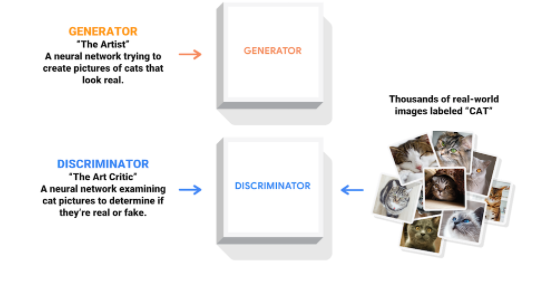

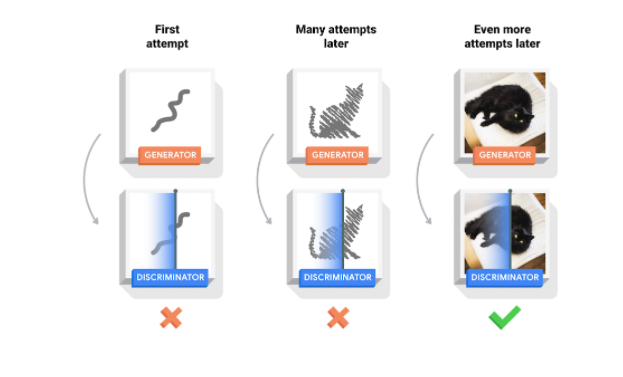

## **Applications of GANs**

1. Generate Examples for Image Datasets
2. Generate Photographs of Human Faces
3. Generate Realistic Photographs
4. Image-to-Image Translation
5. Text-to-Image Translation
6. Semantic-Image-to-Photo Translation
7. Photos to Emojis
8. Face Aging
9. Super Resolution
10. 3D Object Generation

## **Importing Libraries**



In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Conv2D,Dropout,Dense,Flatten,Conv2DTranspose,BatchNormalization,LeakyReLU,Reshape
import tensorflow as tf

from google.colab import drive


## **Loading and Preprocessing the Data**


In [24]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
train_data = pd.read_csv('drive/My Drive/Colab Notebooks/fashion_mnist/fashion-mnist_train.csv')
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


### **Dropping Labels from the Dataset**

In [25]:
X_train = train_data.drop('label',axis=1)
X_train.head()


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,227,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,136,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,0,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [26]:
X_train=X_train.values
print(X_train.shape)

(60000, 784)


In [27]:
X_train=X_train.reshape(-1,28,28,1)
print(X_train.shape)

(60000, 28, 28, 1)


## **Visualizing the Data**

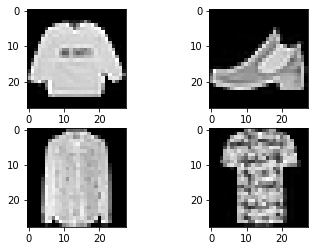

In [28]:
fig,axe=plt.subplots(2,2)
idx = 0
for i in range(2):
    for j in range(2):
        axe[i,j].imshow(X_train[idx].reshape(28,28),cmap='gray')
        idx+=1

The pixel data ranges from 0 to 255 hence dividing each pixel by 255,i.e,normalizing the data such that the range is within 0 to 1.

In [29]:
X_train =  X_train.astype('float32')

In [30]:
X_train = X_train/255
X_train = X_train*2 - 1.

After normalizing it is multiplied with 2 and substracted from 1 such that it ranges from (-1,1) because in DCGANs the last layer generative model activation is tanh which range is (-1,1) unlike sigmoid ranging (0,1) .

In [31]:
print(X_train.max(),X_train.min())

1.0 -1.0


## **Building the Generator**

In [ ]:
generator = Sequential()
generator.add(Dense(512,input_shape=[100]))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(256))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(128))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(784))
generator.add(Reshape([28,28,1]))

In [ ]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               51712     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 512)               0         
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                        

## **Building the Discriminator**

In [ ]:
discriminator = Sequential()
discriminator.add(Dense(1,input_shape=[28,28,1]))
discriminator.add(Flatten())
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(128))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(64))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(1,activation='sigmoid'))

In [ ]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 28, 28, 1)         2         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               200960    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 128)              

1. Compiling the discriminator layer
2. Compiling the GAN

The generator layer is not compiled seperately because it gets trained as part of the combined model but training the discriminator is necessary because it is trained before the combined model.

In [ ]:
GAN =Sequential([generator,discriminator])
discriminator.compile(optimizer='adam',loss='binary_crossentropy')
discriminator.trainable = False

In [ ]:
GAN.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
GAN.layers

In [ ]:
GAN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28, 1)         320656    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 242179    
                                                                 
Total params: 562,835
Trainable params: 318,864
Non-trainable params: 243,971
_________________________________________________________________


In [ ]:
epochs = 30
batch_size = 100
noise_shape=100

Currently on Epoch 1
	Currently on batch number 50 of 600
	Currently on batch number 100 of 600
	Currently on batch number 150 of 600
	Currently on batch number 200 of 600
	Currently on batch number 250 of 600
	Currently on batch number 300 of 600
	Currently on batch number 350 of 600
	Currently on batch number 400 of 600
	Currently on batch number 450 of 600
	Currently on batch number 500 of 600
	Currently on batch number 550 of 600
	Currently on batch number 600 of 600


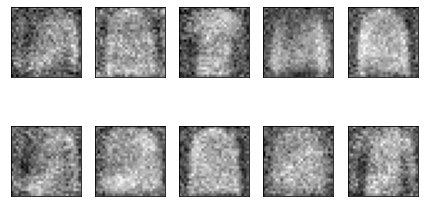

Currently on Epoch 2
	Currently on batch number 50 of 600
	Currently on batch number 100 of 600
	Currently on batch number 150 of 600
	Currently on batch number 200 of 600
	Currently on batch number 250 of 600
	Currently on batch number 300 of 600
	Currently on batch number 350 of 600
	Currently on batch number 400 of 600
	Currently on batch number 450 of 600
	Currently on batch number 500 of 600
	Currently on batch number 550 of 600
	Currently on batch number 600 of 600
Currently on Epoch 3
	Currently on batch number 50 of 600
	Currently on batch number 100 of 600
	Currently on batch number 150 of 600
	Currently on batch number 200 of 600
	Currently on batch number 250 of 600
	Currently on batch number 300 of 600
	Currently on batch number 350 of 600
	Currently on batch number 400 of 600
	Currently on batch number 450 of 600
	Currently on batch number 500 of 600
	Currently on batch number 550 of 600
	Currently on batch number 600 of 600
Currently on Epoch 4
	Currently on batch number 

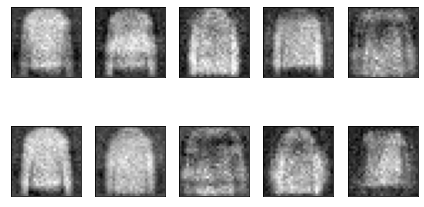

Currently on Epoch 12
	Currently on batch number 50 of 600
	Currently on batch number 100 of 600
	Currently on batch number 150 of 600
	Currently on batch number 200 of 600
	Currently on batch number 250 of 600
	Currently on batch number 300 of 600
	Currently on batch number 350 of 600
	Currently on batch number 400 of 600
	Currently on batch number 450 of 600
	Currently on batch number 500 of 600
	Currently on batch number 550 of 600
	Currently on batch number 600 of 600
Currently on Epoch 13
	Currently on batch number 50 of 600
	Currently on batch number 100 of 600
	Currently on batch number 150 of 600
	Currently on batch number 200 of 600
	Currently on batch number 250 of 600
	Currently on batch number 300 of 600
	Currently on batch number 350 of 600
	Currently on batch number 400 of 600
	Currently on batch number 450 of 600
	Currently on batch number 500 of 600
	Currently on batch number 550 of 600
	Currently on batch number 600 of 600
Currently on Epoch 14
	Currently on batch numb

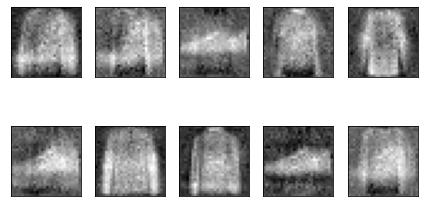

Currently on Epoch 22
	Currently on batch number 50 of 600
	Currently on batch number 100 of 600
	Currently on batch number 150 of 600
	Currently on batch number 200 of 600
	Currently on batch number 250 of 600
	Currently on batch number 300 of 600
	Currently on batch number 350 of 600
	Currently on batch number 400 of 600
	Currently on batch number 450 of 600
	Currently on batch number 500 of 600
	Currently on batch number 550 of 600
	Currently on batch number 600 of 600
Currently on Epoch 23
	Currently on batch number 50 of 600
	Currently on batch number 100 of 600
	Currently on batch number 150 of 600
	Currently on batch number 200 of 600
	Currently on batch number 250 of 600
	Currently on batch number 300 of 600
	Currently on batch number 350 of 600
	Currently on batch number 400 of 600
	Currently on batch number 450 of 600
	Currently on batch number 500 of 600
	Currently on batch number 550 of 600
	Currently on batch number 600 of 600
Currently on Epoch 24
	Currently on batch numb

In [ ]:
with tf.device('/gpu:0'):
 for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    
    
    for i in range(X_train.shape[0]//batch_size):
        
        if (i+1)%50 == 0:
            print(f"\tCurrently on batch number {i+1} of {X_train.shape[0]//batch_size}")
            
        noise=np.random.normal(size=[batch_size,noise_shape])
       
        gen_image = generator.predict_on_batch(noise)
        
        train_dataset = X_train[i*batch_size:(i+1)*batch_size]
       
        #training discriminator on real images
        train_label=np.ones(shape=(batch_size,1))
        discriminator.trainable = True
        d_loss_real=discriminator.train_on_batch(train_dataset,train_label)
        
        #training discriminator on fake images
        train_label=np.zeros(shape=(batch_size,1))
        d_loss_fake=discriminator.train_on_batch(gen_image,train_label)
        
        
        #training generator 
        noise=np.random.normal(size=[batch_size,noise_shape])
        train_label=np.ones(shape=(batch_size,1))
        discriminator.trainable = False
        
        d_g_loss_batch =GAN.train_on_batch(noise, train_label)
        
        
        
       
    #plotting generated images at the start and then after every 10 epoch
    if epoch % 10 == 0:
        samples = 10
        x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, 100)))

        for k in range(samples):
            plt.subplot(2, 5, k+1)
            plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
            plt.xticks([])
            plt.yticks([])

        plt.tight_layout()
        plt.show()

        
        
print('Training is complete')

Noise generated using np.random.normal is given to as input to the generator. 

In the next step the generator produces batches of meaningful alike image from the random distribution.

In [ ]:
noise=np.random.normal(size=[10,noise_shape])

gen_image = generator.predict(noise)

Text(0.5, 1.0, 'How the noise looks')

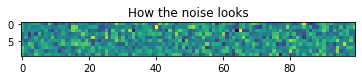

In [ ]:
plt.imshow(noise)
plt.title('How the noise looks')

### **Generator Producing Images from Noise**



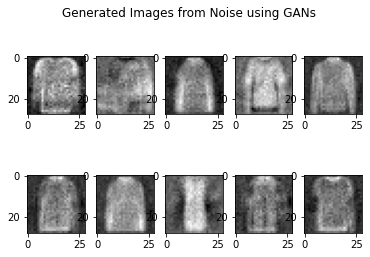

In [ ]:
fig,axe=plt.subplots(2,5)
fig.suptitle('Generated Images from Noise using GANs')
idx=0
for i in range(2):
    for j in range(5):
         axe[i,j].imshow(gen_image[idx].reshape(28,28),cmap='gray')
         idx+=1

## **Inference**

After iterating through few tens of epochs the generator learns to trick the discriminator with only one specific category of output image and hence stops learning beyond that point. The ouput after complete training is thus only single type of images almost similar in features ,i.e, shirts in this particular case and there is no variation in generated image features.

The above issue is further attempted to be resolved using DCGANs

## **GANs using Deep Convolutions**

In this model we construct the generator using transpose convolution layers instead of simple dense layers which helps better in feature capturing and prevents the issue as described earlier. Similarly while building the discriminator layer,instead of simple dense units it uses convolution layers to increase efficiency of it's classification.

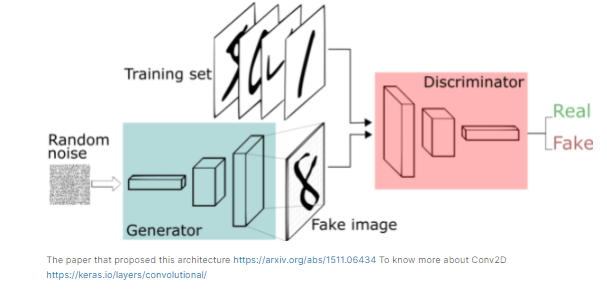

**Generator**

In [32]:
generator = Sequential()
generator.add(Dense(7 * 7 * 128, input_shape=[100]))
generator.add(Reshape([7, 7, 128]))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(64, kernel_size=5, strides=2, padding="same",
                                 activation="relu"))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(1, kernel_size=5, strides=2, padding="same",
                                 activation="tanh"))

In [33]:
generator.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6272)              633472    
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 batch_normalization_2 (Batc  (None, 7, 7, 128)        512       
 hNormalization)                                                 
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 14, 14, 64)       204864    
 ranspose)                                                       
                                                                 
 batch_normalization_3 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                      

### **Discriminator**

In [34]:
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, padding="same",
                        activation=LeakyReLU(0.3),
                        input_shape=[28, 28, 1]))
discriminator.add(Dropout(0.5))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same",
                        activation=LeakyReLU(0.3)))
discriminator.add(Dropout(0.5))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation="sigmoid"))

In [35]:
discriminator.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        1664      
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 6273      
                                                                 
Total params: 212,865
Trainable params: 212,865
Non-tr

**Compiling**

In [36]:
GAN =Sequential([generator,discriminator])
discriminator.compile(optimizer='adam',loss='binary_crossentropy')
discriminator.trainable = False

In [37]:
GAN.compile(optimizer='adam',loss='binary_crossentropy')

In [38]:
GAN.layers

In [39]:
GAN.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 28, 28, 1)         840705    
                                                                 
 sequential_4 (Sequential)   (None, 1)                 212865    
                                                                 
Total params: 1,053,570
Trainable params: 840,321
Non-trainable params: 213,249
_________________________________________________________________


In [40]:
epochs = 10 #vary epoch size as per required to train the model
batch_size = 100

In [41]:
noise_shape=100

Currently on Epoch 1
	Currently on batch number 50 of 600
	Currently on batch number 100 of 600
	Currently on batch number 150 of 600
	Currently on batch number 200 of 600
	Currently on batch number 250 of 600
	Currently on batch number 300 of 600
	Currently on batch number 350 of 600
	Currently on batch number 400 of 600
	Currently on batch number 450 of 600
	Currently on batch number 500 of 600
	Currently on batch number 550 of 600
	Currently on batch number 600 of 600


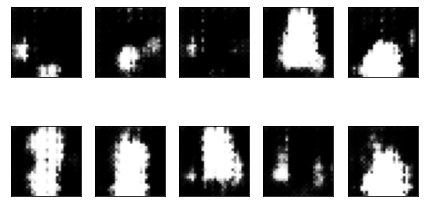

Currently on Epoch 2
	Currently on batch number 50 of 600
	Currently on batch number 100 of 600
	Currently on batch number 150 of 600
	Currently on batch number 200 of 600
	Currently on batch number 250 of 600
	Currently on batch number 300 of 600
	Currently on batch number 350 of 600
	Currently on batch number 400 of 600
	Currently on batch number 450 of 600
	Currently on batch number 500 of 600
	Currently on batch number 550 of 600
	Currently on batch number 600 of 600
Currently on Epoch 3
	Currently on batch number 50 of 600
	Currently on batch number 100 of 600
	Currently on batch number 150 of 600
	Currently on batch number 200 of 600
	Currently on batch number 250 of 600
	Currently on batch number 300 of 600
	Currently on batch number 350 of 600
	Currently on batch number 400 of 600
	Currently on batch number 450 of 600
	Currently on batch number 500 of 600
	Currently on batch number 550 of 600
	Currently on batch number 600 of 600
Currently on Epoch 4
	Currently on batch number 

In [42]:
with tf.device('/gpu:0'):
 for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    
    
    for i in range(X_train.shape[0]//batch_size):
        
        if (i+1)%50 == 0:
            print(f"\tCurrently on batch number {i+1} of {X_train.shape[0]//batch_size}")
            
        noise=np.random.normal(size=[batch_size,noise_shape])
       
        gen_image = generator.predict_on_batch(noise)
        
        train_dataset = X_train[i*batch_size:(i+1)*batch_size]
       
        #training discriminator on real images
        train_label=np.ones(shape=(batch_size,1))
        discriminator.trainable = True
        d_loss_real=discriminator.train_on_batch(train_dataset,train_label)
        
        #training discriminator on fake images
        train_label=np.zeros(shape=(batch_size,1))
        d_loss_fake=discriminator.train_on_batch(gen_image,train_label)
        
        
        #training generator 
        noise=np.random.normal(size=[batch_size,noise_shape])
        train_label=np.ones(shape=(batch_size,1))
        discriminator.trainable = False #while training the generator as combined model,discriminator training should be turned off
        
        d_g_loss_batch =GAN.train_on_batch(noise, train_label)
        
        
        
       
    #plotting generated images at the start and then after every 10 epoch
    if epoch % 10 == 0:
        samples = 10
        x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, 100)))

        for k in range(samples):
            plt.subplot(2, 5, k+1)
            plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
            plt.xticks([])
            plt.yticks([])

        plt.tight_layout()
        plt.show()

        
        
print('Training is complete')

In [43]:
noise=np.random.normal(loc=0, scale=1, size=(100,noise_shape))

gen_image = generator.predict(noise)

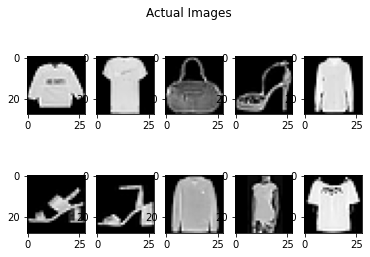

In [46]:
fig,axe=plt.subplots(2,5)
fig.suptitle("Actual Images")
idx = 0
for i in range(2):
    for j in range(5):
        axe[i,j].imshow(X_train[idx].reshape(28,28),cmap='gray')
        idx+=10

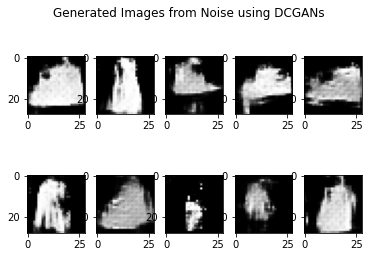

In [47]:
fig,axe=plt.subplots(2,5)
fig.suptitle('Generated Images from Noise using DCGANs')
idx=0
for i in range(2):
     for j in range(5):
         axe[i,j].imshow(gen_image[idx].reshape(28,28),cmap='gray')
         idx+=3

## **Inference**

Introduction of deep convolution GAN helps in improving the variation in the output data and prevents the model from being stuck on single type of image. The generator seems to be capable of creating meaningful images from noise inputs without even seeing the actual images.

## **Conclusion**

We implemented image generative models using some popular approaches like Autoencoders, Variational autoencoders and GANs. We saw how changing the Architectures influences the quality of image generated and visualized the data.

### **References**


1. Dataset - TMNIST- https://www.kaggle.com/nikbearbrown/tmnist-alphabet-94-characters
2. Dataset - Fashion_mnist - https://www.kaggle.com/sayakdasgupta/introduction-to-gans-on-fashion-mnist-dataset/data
3. GANs - https://towardsdatascience.com/building-a-gan-with-pytorch-237b4b07ca9a
4. Gans - https://www.analyticsvidhya.com/blog/2021/06/a-detailed-explanation-of-gan-with-implementation-using-tensorflow-and-keras/
5. Autoencoders - https://dropsofai.com/autoencoders-in-keras-and-deep-learning/
6. Autoencoders - https://www.kaggle.com/nathra/fashion-mnist-convolutional-autoencoder/notebook
7. VAEs - https://becominghuman.ai/using-variational-autoencoder-vae-to-generate-new-images-14328877e88d
8. VAEs - https://towardsdatascience.com/understanding-variational-autoencoders-vaes-f70510919f73
9. VAEs - https://dropsofai.com/variational-autoencoders-and-image-generation-with-keras/



## **LICENSE**

Copyright <2021> Keshav K L

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.